## Logistic Regression

In [1011]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("titanictrain.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1012]:
len(df.index)

891

In [1013]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Analyse data

<Axes: xlabel='Survived', ylabel='count'>

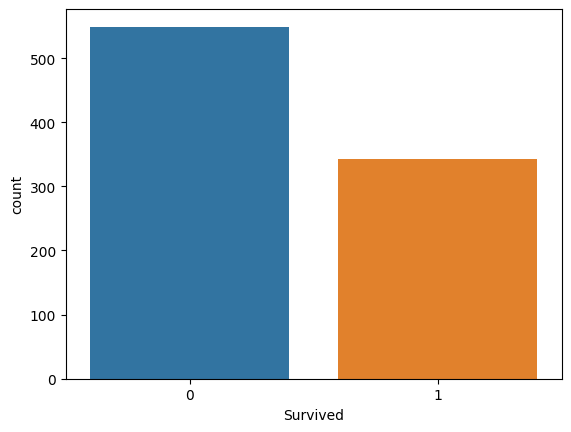

In [1014]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

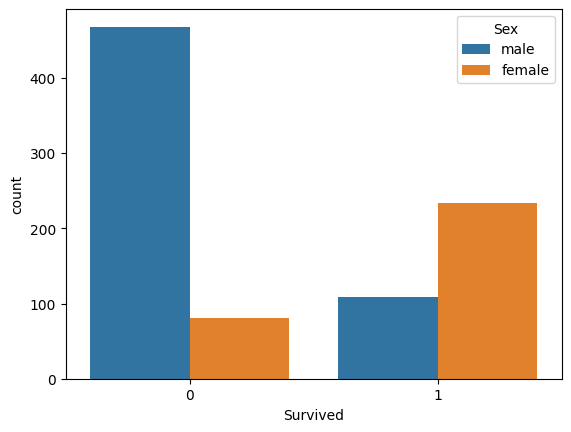

In [1015]:
sns.countplot(x="Survived",hue="Sex",data=df)

<Axes: xlabel='Survived', ylabel='count'>

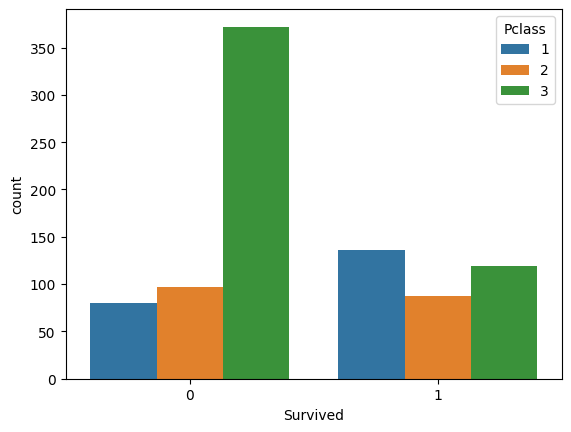

In [1016]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<Axes: xlabel='Age', ylabel='Count'>

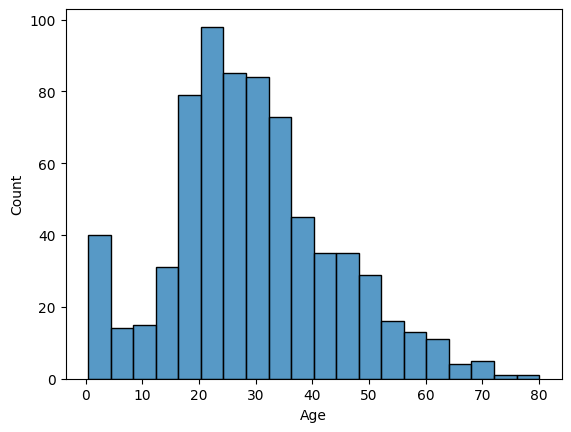

In [1017]:
sns.histplot(x="Age",data=df)

<Axes: xlabel='Fare', ylabel='Density'>

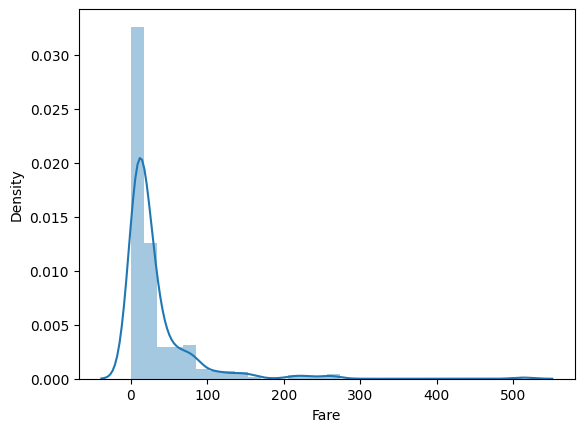

In [1018]:
sns.distplot(df["Fare"],bins=30)

## Data Cleaning (Wrangling)

In [1019]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

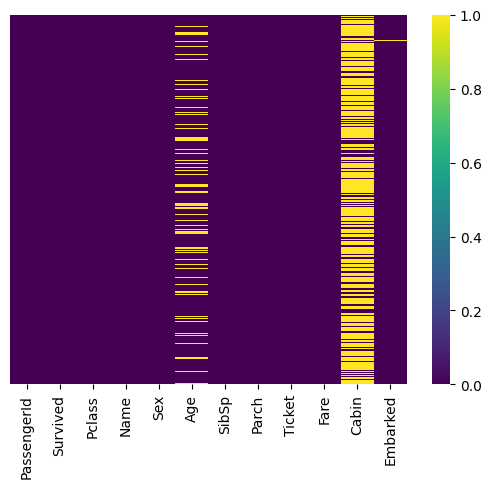

In [1020]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<Axes: xlabel='Pclass', ylabel='Age'>

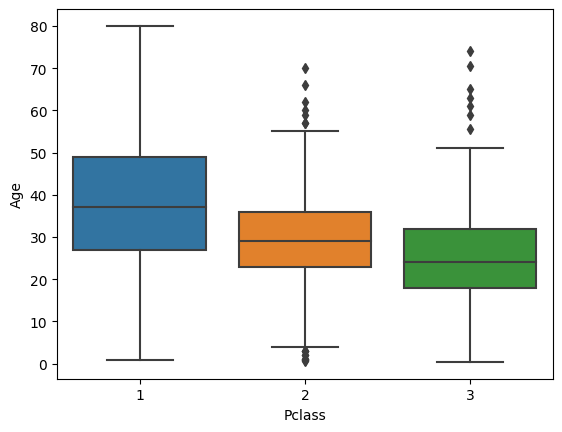

In [1021]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [1022]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1023]:
df.drop("Cabin",axis=1,inplace=True)

In [1024]:
df.dropna(inplace=True)

<Axes: >

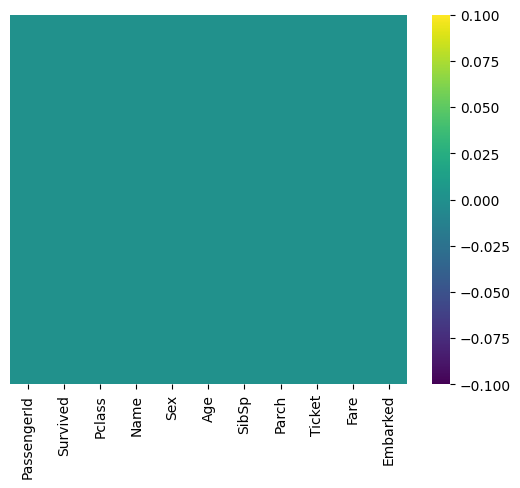

In [1025]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

 ### Our Data have string values, needs to be converted to categorical values to implement logistic regression
 ### we will use dummy variables

In [1026]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [1027]:
df.duplicated().sum()

0

In [1028]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1029]:
sex = pd.get_dummies(df[["Sex"]],drop_first=True,dtype=int)
class_embar = pd.get_dummies(df[["Pclass","Embarked"]],dtype=int)

In [1030]:
print(sex.head())
print(class_embar.head())

   Sex_male
0         1
1         0
2         0
3         0
4         1
   Pclass  Embarked_C  Embarked_Q  Embarked_S
0       3           0           0           1
1       1           1           0           0
2       3           0           0           1
3       1           0           0           1
4       3           0           0           1


In [1031]:
df1 = pd.concat([df,sex,class_embar],axis=1)

In [1032]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Pclass,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,3,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,3,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,3,0,0,1


In [1033]:
df1.drop(['PassengerId','Pclass','Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [1034]:
df1.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [1035]:
df1.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,0,1


In [1036]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Age         712 non-null    float64
 2   SibSp       712 non-null    int64  
 3   Parch       712 non-null    int64  
 4   Fare        712 non-null    float64
 5   Sex_male    712 non-null    int32  
 6   Embarked_C  712 non-null    int32  
 7   Embarked_Q  712 non-null    int32  
 8   Embarked_S  712 non-null    int32  
dtypes: float64(2), int32(4), int64(3)
memory usage: 44.5 KB


In [1037]:
#train Test Split
X = df1.drop('Survived',axis=1)
y = df1.Survived

In [1038]:
from sklearn.model_selection import train_test_split

In [1039]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=100)

In [1040]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((498, 8), (214, 8), (498,), (214,))

In [1041]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [1042]:
lr.fit(x_train,y_train)

LogisticRegression()

In [1043]:
y_pred = lr.predict(x_test)

In [1044]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [1045]:
lr.predict_proba(x_test)

array([[2.25781942e-01, 7.74218058e-01],
       [1.32293607e-01, 8.67706393e-01],
       [9.26705100e-01, 7.32948996e-02],
       [3.24689520e-01, 6.75310480e-01],
       [8.03750013e-01, 1.96249987e-01],
       [8.01743565e-01, 1.98256435e-01],
       [8.34574640e-01, 1.65425360e-01],
       [7.17788491e-01, 2.82211509e-01],
       [2.61872695e-01, 7.38127305e-01],
       [8.43369060e-01, 1.56630940e-01],
       [2.77437065e-01, 7.22562935e-01],
       [8.08568604e-01, 1.91431396e-01],
       [2.23050102e-01, 7.76949898e-01],
       [3.60309501e-01, 6.39690499e-01],
       [7.15210583e-01, 2.84789417e-01],
       [7.84522902e-01, 2.15477098e-01],
       [2.11718814e-01, 7.88281186e-01],
       [8.49153319e-01, 1.50846681e-01],
       [2.72445445e-01, 7.27554555e-01],
       [8.06227438e-01, 1.93772562e-01],
       [2.11645696e-01, 7.88354304e-01],
       [4.92450135e-01, 5.07549865e-01],
       [8.18162446e-01, 1.81837554e-01],
       [7.46305221e-01, 2.53694779e-01],
       [8.004613

In [1046]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

In [1047]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("F1Score: ",f1_score(y_test,y_pred))

Accuracy:  0.7850467289719626
Recall:  0.6777777777777778
Precision:  0.782051282051282
F1Score:  0.7261904761904762
